# **Generating new features**

- Sometimes the format of our data can limit our ability to detect relationships or inhibit the potential performance of machine learning models. 
- One method to overcome these issues is to generate new features from our data!

# **Correlation**

- Checking correlation with a heatmap, we see a moderate positive correlation between Price and Duration, but it looks like those are the only numeric variables in our dataset.

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(planes.corr(), annot=True) 
plt.show() 

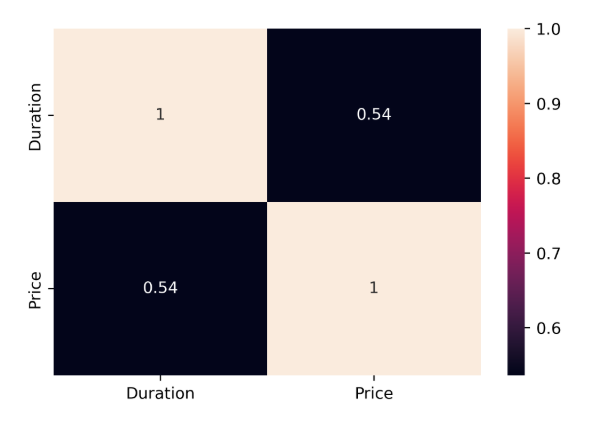

# **Viewing data types**

- Viewing the data types confirms this is the case. However, Total_Stops should also be numeric.

In [ ]:
print(planes.dtypes)

In [ ]:
Column Name          Data Type
Airline              object
Date_of_Journey      datetime64[ns]
Source               object
Destination          object
Route                object
Dep_Time             datetime64[ns]
Arrival_Time         datetime64[ns]
Duration             float64
Total_Stops          object
Additional_Info      object
Price                float64
dtype: object

# **Total stops**

- Viewing the value_counts, we see we need to remove string characters, and change non-stop to zero, before converting the data type to integer.

In [ ]:
print(planes["Total_Stops"].value_counts())

In [ ]:
Total_Stops    Count
1 stop         4107
non-stop       2584
2 stops        1127
3 stops          29
4 stops           1

# **Cleaning total stops**

- We use the string-dot-replace method to first remove " stops", including the space, so that flights with two, three, or four stops are ready to convert. 
- Next we clean flights with one stop. Lastly, we change "non-stop" to "0", then set the data type to integer.

In [ ]:
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stops", "")
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stop", "")
planes["Total_Stops"] = planes["Total_Stops"].str.replace("non-stop", "0")
planes["Total_Stops"] = planes["Total_Stops"].astype(int)

**Correlation**

- Unsurprisingly, Total_Stops is strongly correlated with Duration. 
- What is interesting is that Total_Stops and Price are more strongly correlated than Duration is with Price! Let's see what else we can find out!

In [ ]:
# Assuming 'planes' is a pandas DataFrame
sns.heatmap(planes.corr(), annot=True)  # Create a heatmap of the correlation matrix
plt.show() # Display the heatmap

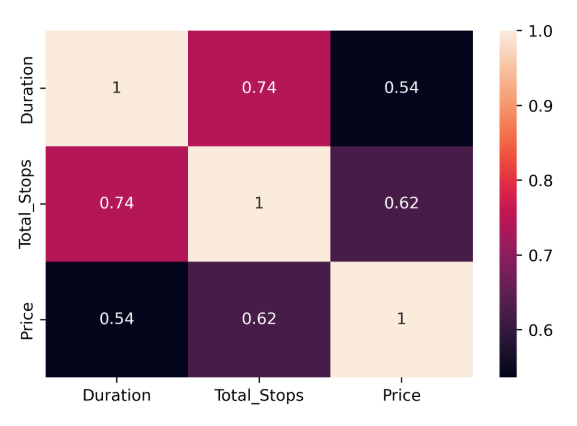

# **Dates**

- Rechecking our data types, notice that there are three datetime variables - Date_of_Journey, Dep_Time, and Arrival_Time.

In [ ]:
print(planes.dtypes)

In [ ]:
Airline              object
Date_of_Journey      datetime64[ns]
Source               object
Destination          object
Route                object
Dep_Time             datetime64[ns]
Arrival_Time         datetime64[ns]
Duration             float64
Total_Stops          int64
Additional_Info      object
Price                float64
dtype: object

# **Extracting month and weekday**

- We know how to extract attributes from datetime values, so we can see if these offer any insights into pricing. 
- To start, let's look at Date_of_Journey. 
- If we think prices vary per month, it's worth using this attribute - we create it as a column in our DataFrame. 
- Perhaps prices might also differ depending on the day of the week? 
- Let's grab that using the dt-dot-weekday attribute. 
- It returns values of zero, representing Monday, through to seven, for Sunday. 
- Previewing these columns we see the first flight, departing on the 6th September, was a Friday, indicated by a four.

In [ ]:
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday
print(planes[["month", "weekday", "Date_of_Journey"]].head())

In [ ]:
   month  weekday   Date_of_Journey
0      9        4        2019-09-06
1     12        3        2019-12-05
2      1        3        2019-01-03
3      6        0        2019-06-24
4     12        1        NaN

# **Departure and arrival times**

- We might wonder if people tend to pay more to depart or arrive at more convenient times. 
- We extract the hour of departure and arrival from those respective columns too.

In [ ]:
# Extract the hour from the 'Dep_Time' column and store it in 'Dep_Hour' column.
planes["Dep_Hour"] = planes["Dep_Time"].dt.hour

# Extract the hour from the 'Arrival_Time' column and store it in 'Arrival_Hour' column.
planes["Arrival_Hour"] = planes["Arrival_Time"].dt.hour

**Correlation**

- Because they are numeric, we can calculate correlation between these new datetime features and other variables. 
- Re-plotting our heatmap, unfortunately there aren't any new strong relationships. 
- But we wouldn't have known this if we hadn't generated these features.

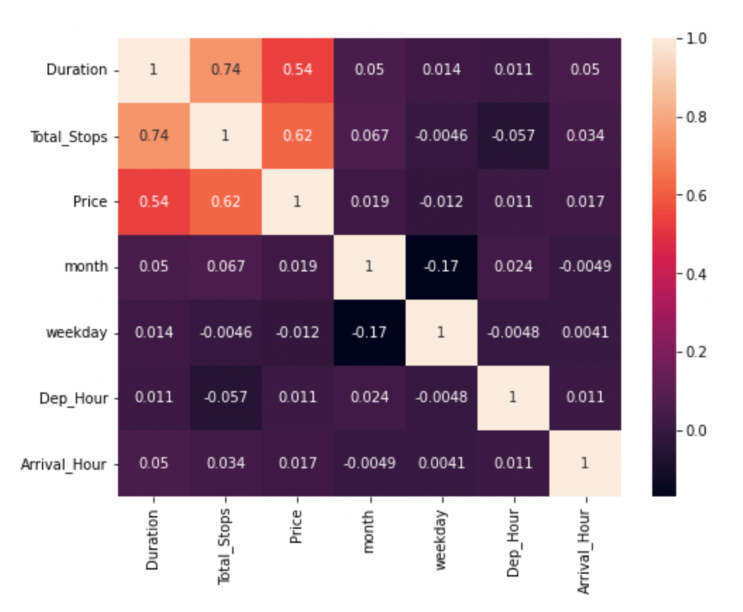

# **Creating categories**

- There's one more technique we can use to generate new features. 
- We can group numeric data and label them as classes. 
- For example, we don't have a column for ticket type. 
- We could use descriptive statistics to label flights as economy, premium economy, business class, or first class, based on prices within specific ranges, or bins.

In [ ]:
print(planes["Price"].describe())

In [ ]:
count     7848.000000
mean      9035.413609
std       4429.822081
min       1759.000000
25%       5228.000000
50%       8355.000000
75%      12373.000000
max      54826.000000
Name: Price, dtype: float64

| Range          | Ticket Type       |
|-----------------|--------------------|
| <= 5228         | Economy            |
| > 5228 <= 8355  | Premium Economy    |
| > 8335 <= 12373 | Business Class     |
| > 12373         | First Class        |

# **Descriptive statistics**

- We'll split equally across the price range using quartiles. 
- We first store the 25th percentile using the quantile method. 
- We get the 50th percentile by calling the median. Next we get the 75th percentile, and lastly, we store the maximum value.

In [ ]:
# Calculate the 25th percentile of the 'Price' column
twenty_fifth = planes["Price"].quantile(0.25)

# Calculate the median of the 'Price' column
median = planes["Price"].median()

# Calculate the 75th percentile of the 'Price' column
seventy_fifth = planes["Price"].quantile(0.75)

# Calculate the maximum value of the 'Price' column
maximum = planes["Price"].max()

# **Labels and bins**

- We create the labels, in this case our ticket types, and store as a list. 
- Next, we create the bins, a list starting from zero and including our descriptive statistic variables.

In [ ]:
labels = ["Economy", "Premium Economy", "Business Class", "First Class"]
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

# **pd.cut()**

- We now call the pd-dot-cut function,
- passing our Price column,
- setting the labels argument equal to our labels variable,
- and the bins argument equal to our bins.

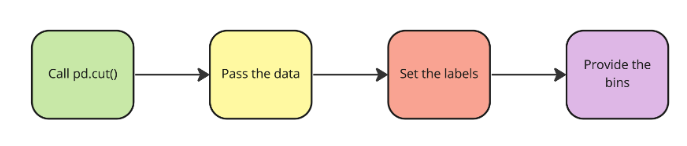

In [ ]:
# Create a new column 'Price_Category' by categorizing the 'Price' column using pd.cut
planes["Price_Category"] = pd.cut(planes["Price"], labels=labels, bins=bins)

# **Price categories**

- Previewing the Price and Price_Category columns, we see the mapping has been successfully applied!

In [ ]:
print(planes[["Price", "Price_Category"]].head())

In [ ]:
Index  Price    Price_Category
0      13882.0  First Class
1      6218.0   Premium Economy
2      13302.0  First Class
3      3873.0   Economy
4      11087.0  Business Class

**Price category by airline**

- We can plot the count of flights in different categories per airline by passing our new column to the hue argument when calling sns-dot-countplot.

In [ ]:
# Create the countplot
sns.countplot(data=planes, x="Airline", hue="Price_Category")

# Display the plot
plt.show()

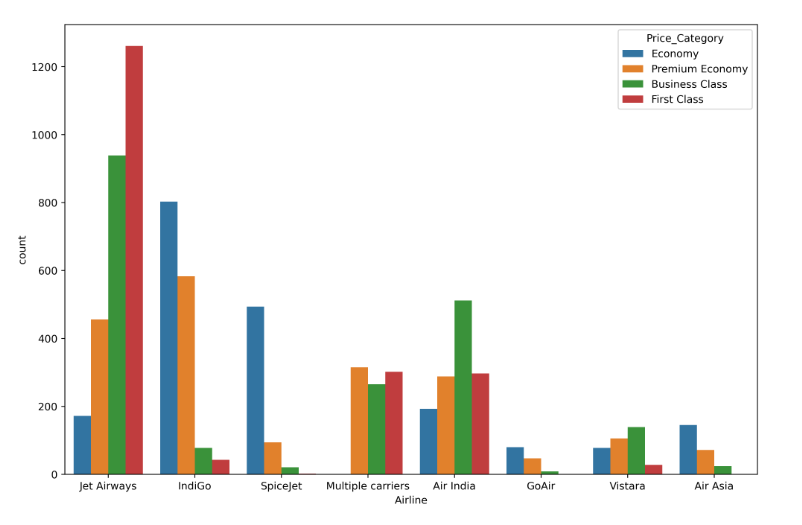

- Looks like Jet Airways has the largest number of "First Class" tickets, while most of IndiGo and SpiceJet's flights are "Economy".